# STEP 1: IMPORTING THE LIBRARIES

In [14]:
!pip install xgboost

In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Time Series Models
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# For Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# For XGBoost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


# STEP 2: LOADING THE DATASET

In [16]:
air_aware_data = pd.read_csv(r"station_day.csv")

In [17]:
print(air_aware_data.columns)
air_aware_data.head()

Index(['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [18]:
print("Info:")
display(air_aware_data.info())

print("Missing values per columns:")
display(air_aware_data.isnull().sum())

print("Descriptive stats:")
display(air_aware_data.describe(include='all').T)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   PM2.5       86410 non-null   float64
 2   PM10        65329 non-null   float64
 3   NO          90929 non-null   float64
 4   NO2         91488 non-null   float64
 5   NOx         92535 non-null   float64
 6   NH3         59930 non-null   float64
 7   CO          95037 non-null   float64
 8   SO2         82831 non-null   float64
 9   O3          82467 non-null   float64
 10  Benzene     76580 non-null   float64
 11  Toluene     69333 non-null   float64
 12  Xylene      22898 non-null   float64
 13  AQI         87025 non-null   float64
 14  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(2)
memory usage: 12.4+ MB


None

Missing values per columns:


,0
StationId,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204
O3,25568


Descriptive stats:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
StationId,108035,110,DL007,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM2.5,86410.0,NaN,NaN,NaN,80.272571,76.526403,0.02,31.88,55.95,99.92,1000.0
PM10,65329.0,NaN,NaN,NaN,157.968427,123.418672,0.01,70.15,122.09,208.67,1000.0
NO,90929.0,NaN,NaN,NaN,23.123424,34.491019,0.01,4.84,10.29,24.98,470.0
NO2,91488.0,NaN,NaN,NaN,35.24076,29.510827,0.01,15.09,27.21,46.93,448.05
NOx,92535.0,NaN,NaN,NaN,41.195055,45.145976,0.0,13.97,26.66,50.5,467.63
NH3,59930.0,NaN,NaN,NaN,28.732875,24.897797,0.01,11.9,23.59,38.1375,418.9
CO,95037.0,NaN,NaN,NaN,1.605749,4.369578,0.0,0.53,0.91,1.45,175.81
SO2,82831.0,NaN,NaN,NaN,12.257634,12.984723,0.01,5.04,8.95,14.92,195.65
O3,82467.0,NaN,NaN,NaN,38.134836,39.128004,0.01,18.895,30.84,47.14,963.0


## Handle missing values, duplicates,and wrong data

In [19]:
# Drop duplicates
air_aware_data.drop_duplicates(inplace=True)

In [20]:
pollutant_cols = ['AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

# covert columns to numeric, coercing errors to NaN
for col in pollutant_cols:
    air_aware_data[col] = pd.to_numeric(air_aware_data[col] ,errors = 'coerce')

# Fill missing numeric values with median
for col in pollutant_cols:
    median_val = air_aware_data[col].median()
    air_aware_data[col].fillna(median_val)

# remove negative values if any
for col in pollutant_cols:
    air_aware_data = air_aware_data[air_aware_data[col] >= 0]

# Exploratory Data Analysis(EDA)

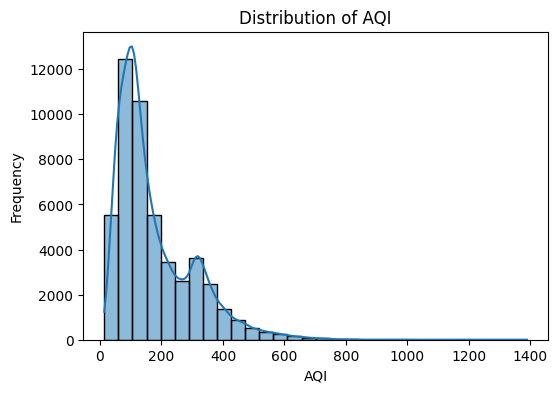

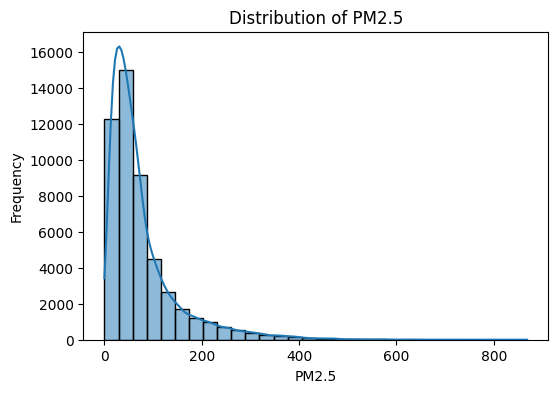

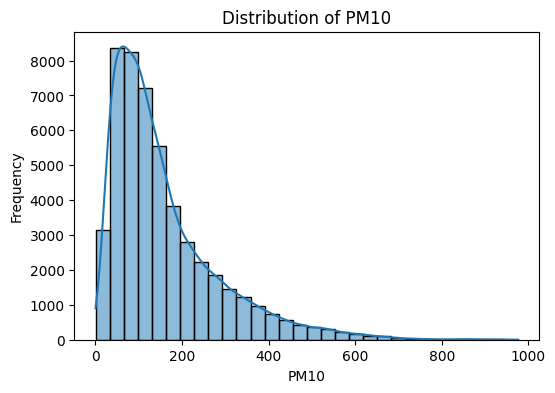

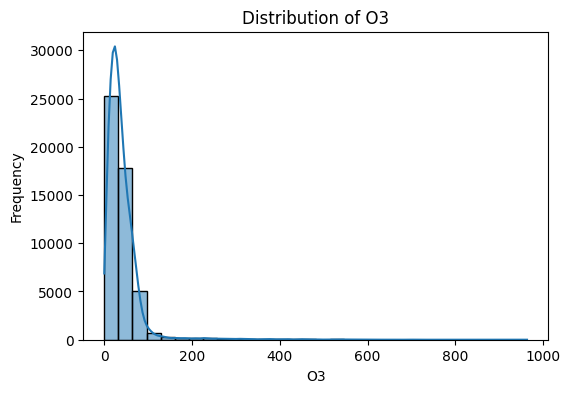

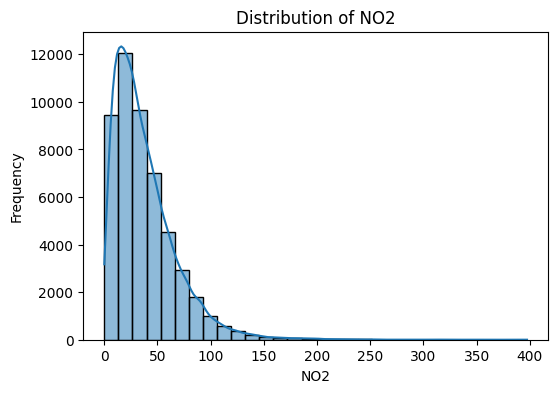

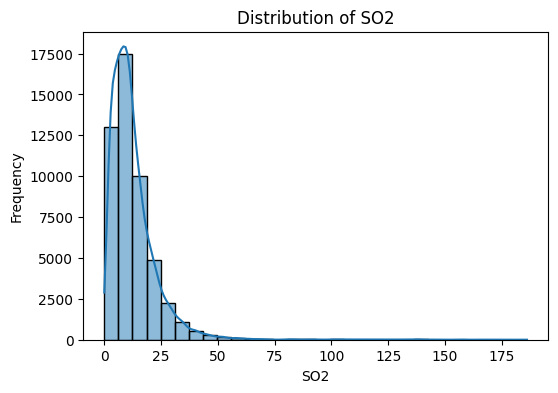

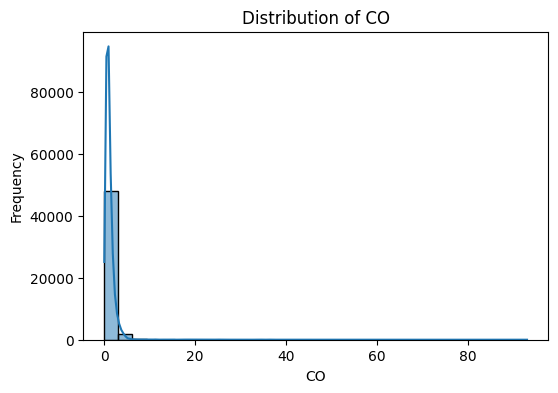

In [21]:
for col in pollutant_cols:
    plt.figure(figsize=(6,4))  # ✅ use figsize, not figure
    sns.histplot(air_aware_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Feature Scaling

In [22]:
# Scale all numeric pollutant columns between 0 and 1
scaler = MinMaxScaler()
air_aware_data[pollutant_cols] = scaler.fit_transform(air_aware_data[pollutant_cols])

print("Scaled data sample:\n", air_aware_data.head())

Scaled data sample:
   StationId     PM2.5      PM10    NO       NO2    NOx    NH3        CO  \
1     AP001  0.093551  0.127300  1.44  0.051573  12.08  10.72  0.001291   
2     AP001  0.090005  0.131969  1.26  0.065417  14.85  10.28  0.001506   
3     AP001  0.102025  0.138379  6.60  0.077624  21.77  12.91  0.001183   
4     AP001  0.073724  0.106401  2.56  0.070627  17.01  11.42  0.000968   
5     AP001  0.083269  0.117409  5.23  0.058369  16.59  12.25  0.001721   

        SO2        O3  Benzene  Toluene  Xylene       AQI AQI_Bucket  
1  0.081851  0.131964     0.20     6.50    0.06  0.123636   Moderate  
2  0.144838  0.121943     0.22     7.95    0.08  0.133091   Moderate  
3  0.180470  0.116097     0.29     7.63    0.12  0.133818   Moderate  
4  0.102058  0.143480     0.17     5.02    0.07  0.126545   Moderate  
5  0.056645  0.113947     0.21     4.71    0.08  0.115636   Moderate  


In [23]:
# Features and target
X = air_aware_data[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = air_aware_data['AQI']

print("Feature sample:\n", X.head())
print("Target sample:\n", y.head())

Feature sample:
       PM2.5      PM10        O3       NO2       SO2        CO
1  0.093551  0.127300  0.131964  0.051573  0.081851  0.001291
2  0.090005  0.131969  0.121943  0.065417  0.144838  0.001506
3  0.102025  0.138379  0.116097  0.077624  0.180470  0.001183
4  0.073724  0.106401  0.143480  0.070627  0.102058  0.000968
5  0.083269  0.117409  0.113947  0.058369  0.056645  0.001721
Target sample:
 1    0.123636
2    0.133091
3    0.133818
4    0.126545
5    0.115636
Name: AQI, dtype: float64


In [26]:
air_aware_data.to_csv("cleaned_air_quality_data.csv", index=False)

In [27]:
# Load your cleaned dataset
air_aware_data= pd.read_csv("cleaned_air_quality_data.csv")

air_aware_data.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,0.093551,0.127300,1.44,0.051573,12.08,10.72,0.001291,0.081851,0.131964,0.20,6.50,0.06,0.123636,Moderate
1,AP001,0.090005,0.131969,1.26,0.065417,14.85,10.28,0.001506,0.144838,0.121943,0.22,7.95,0.08,0.133091,Moderate
2,AP001,0.102025,0.138379,6.60,0.077624,21.77,12.91,0.001183,0.180470,0.116097,0.29,7.63,0.12,0.133818,Moderate
3,AP001,0.073724,0.106401,2.56,0.070627,17.01,11.42,0.000968,0.102058,0.143480,0.17,5.02,0.07,0.126545,Moderate
4,AP001,0.083269,0.117409,5.23,0.058369,16.59,12.25,0.001721,0.056645,0.113947,0.21,4.71,0.08,0.115636,Moderate


# STEP 3 : EXPLORING THE DATA

In [28]:
# Basic stats
print(air_aware_data.describe())

# Check for missing values
print(air_aware_data.isnull().sum())

# Handle missing data if any
air_aware_data = air_aware_data.fillna(method='ffill')

              PM2.5          PM10            NO           NO2           NOx  \
count  49997.000000  49997.000000  49285.000000  49997.000000  48947.000000   
mean       0.087692      0.161792     25.108887      0.095625     47.177067   
std        0.086026      0.128682     36.544229      0.075305     48.292129   
min        0.000000      0.000000      0.020000      0.000000      0.000000   
25%        0.033782      0.070593      4.290000      0.041530     16.430000   
50%        0.060610      0.123163     10.690000      0.077448     30.890000   
75%        0.106585      0.213191     28.530000      0.129675     58.335000   
max        1.000000      1.000000    374.710000      1.000000    429.380000   

                NH3            CO           SO2            O3       Benzene  \
count  48086.000000  49997.000000  49997.000000  49997.000000  45007.000000   
mean      27.481031      0.013292      0.068373      0.042495      4.226923   
std       21.146745      0.022754      0.058973    

# STEP 4: SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [30]:
from sklearn.preprocessing import StandardScaler

# Select features and target
X = air_aware_data[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = air_aware_data['AQI']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Scale features for models that need normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 5: BUILDING EACH MODEL

In [31]:
# STEP 5.1: BUILDING ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare AQI as time series
aqi_series = air_aware_data['AQI'].fillna(method='ffill')

# Split into train and test (80-20)
train_size = int(len(aqi_series) * 0.8)
train, test = aqi_series[:train_size], aqi_series[train_size:]

# Build and fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast
forecast_arima = arima_fit.forecast(steps=len(test))

# Evaluate
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mae_arima = mean_absolute_error(test, forecast_arima)
print("ARIMA -> MAE:", mae_arima, " RMSE:", rmse_arima)

ARIMA -> MAE: 0.03439604653795488  RMSE: 0.052344814231407334


In [32]:
# STEP 5.2: BUILDING PROPHET MODEL
from prophet import Prophet

# Create Prophet-compatible dataframe
prophet_df = air_aware_data.copy()
prophet_df['ds'] = pd.date_range(start='2020-01-01', periods=len(prophet_df), freq='D')
prophet_df['y'] = prophet_df['AQI']

# Split train and test
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

# Build Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Forecast for the test period
future = prophet_model.make_future_dataframe(periods=len(test_prophet))
forecast_prophet = prophet_model.predict(future)

# Extract forecasted values
y_pred_prophet = forecast_prophet['yhat'][-len(test_prophet):]

# Evaluate
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], y_pred_prophet))
mae_prophet = mean_absolute_error(test_prophet['y'], y_pred_prophet)
print("Prophet -> MAE:", mae_prophet, " RMSE:", rmse_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4a4esiv/on25bugc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4a4esiv/g_f0qg3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96904', 'data', 'file=/tmp/tmpz4a4esiv/on25bugc.json', 'init=/tmp/tmpz4a4esiv/g_f0qg3s.json', 'output', 'file=/tmp/tmpz4a4esiv/prophet_modeli83seh6b/prophet_model-20251021051219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet -> MAE: 0.06388660565047644  RMSE: 0.0725570941667976


In [33]:
# STEP 5.3: BUILDING XGBOOST MODEL
from xgboost import XGBRegressor

# Build and train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost -> MAE:", mae_xgb, " RMSE:", rmse_xgb)

XGBoost -> MAE: 0.010285705553189887  RMSE: 0.015379287823359209


# STEP 5.4: BUILDING LSTM MODEL


In [34]:
# Load and Preprocess the Dataset
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
# Example: Use your Air Quality DataFrame
df = air_aware_data.copy()

# Choose target variable (AQI or PM2.5)
target_col = 'AQI'

# Fill missing values
df = df.fillna(method='ffill')

# Normalize the target feature for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_col]])

In [36]:
# Create Time Series Sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Use 24-hour window (or choose any lag)
time_steps = 24
X, y = create_sequences(scaled_data, time_steps)

# Split into train and test sets (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [37]:
# Build the LSTM Model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the Model
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = lstm_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_pred = lstm_model.predict(X_test)

# Inverse transform to get original AQI values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("LSTM -> MAE:", mae_lstm, " RMSE:", rmse_lstm)

Epoch 1/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.0045 - val_loss: 9.6674e-04
Epoch 2/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - loss: 0.0023 - val_loss: 6.5769e-04
Epoch 3/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - loss: 0.0020 - val_loss: 6.5824e-04
Epoch 4/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - loss: 0.0019 - val_loss: 6.2292e-04
Epoch 5/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - loss: 0.0019 - val_loss: 6.0976e-04
Epoch 6/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - loss: 0.0019 - val_loss: 6.4809e-04
Epoch 7/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - loss: 0.0019 - val_loss: 6.2981e-04
Epoch 8/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - loss: 0.0019 - val_loss: 6.8760e-04
Epoch 9/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - loss: 0.0018 - val_loss: 7.1749e-04
Epoch 10/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - loss: 0.0019 - val_loss: 6.0990e-04
Epoch 11/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - 

In [39]:
# ----- Compare All Models -----
results = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet', 'LSTM', 'XGBoost'],
    'MAE': [mae_arima, mae_prophet, mae_lstm, mae_xgb],
    'RMSE': [rmse_arima, rmse_prophet,rmse_lstm, rmse_xgb]
})

print("\n📊 Model Comparison:")
print(results)

best_model = results.loc[results['RMSE'].idxmin(), 'Model']
print(f"\n✅ Best Performing Model: {best_model}")


📊 Model Comparison:
     Model       MAE      RMSE
0    ARIMA  0.034396  0.052345
1  Prophet  0.063887  0.072557
2     LSTM  0.013738  0.021570
3  XGBoost  0.010286  0.015379

✅ Best Performing Model: XGBoost


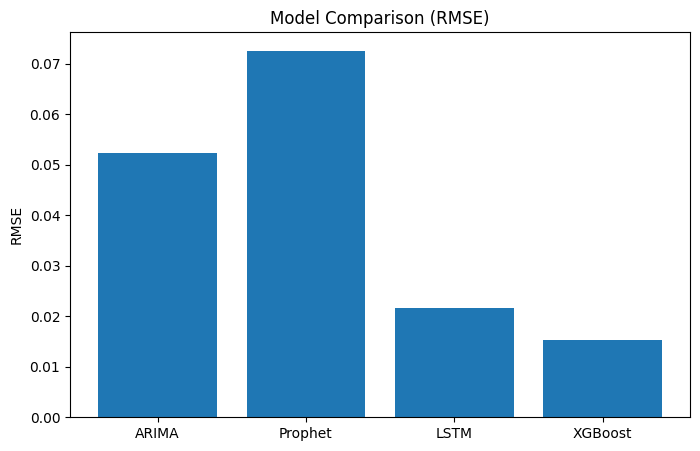

In [40]:
plt.figure(figsize=(8,5))
models = ['ARIMA', 'Prophet', 'LSTM', 'XGBoost']
rmses = [rmse_arima, rmse_prophet, rmse_lstm, rmse_xgb]
plt.bar(models, rmses)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()